# Intro to ML (Jupyter, Tensorflow and Linear Regression)

## What is Juptyer

Allows you to run python commands in line with markdown. It allows you to document your ML process in an easily shareable repeatable way

## What is Tensorflow

Tensorflow is a machine learning library. What does that mean? It allows you to make function calls that hide away the algorithms underneath so that you don't have to implement the algorithm yourself

In [70]:
import tensorflow as tf # Machine learning library (has ML algorithms and helper functions built in)

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2.3.1


Other helpful libraries in ML that we'll be using

In [71]:
import matplotlib.pyplot as plt
import numpy as np # common python library manipulating matrices/arrays
import pandas as pd # another common python library for manipulating data
import seaborn as sns # helps with data visualization


# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

## What is Lineary Regression

Example of implementing linear regression  
https://realpython.com/linear-regression-in-python/

Example of language barrier  
https://scikit-learn.org/stable/modules/linear_model.html

Can we predict Car MPG based on details about the car like horsepower?

### Read in Car Data

In [72]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [73]:
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


### Clean Dataset

In [74]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [75]:
dataset = dataset.dropna()

In [76]:
#convert number groups to words with meaning
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'}) 

In [77]:
# split Origin category into multiple columns with booleans 
dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


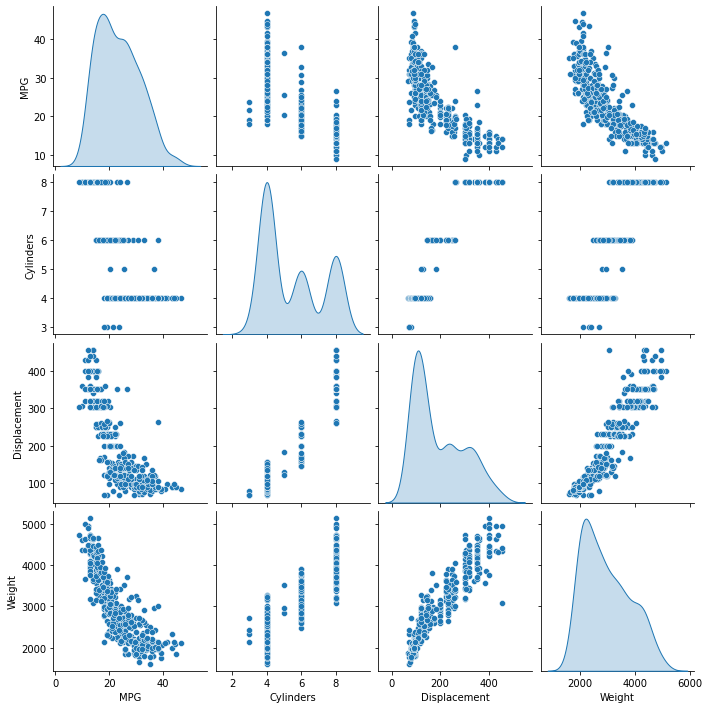

In [78]:
# use the sns library to visualize the results of the training
sns.pairplot(dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

In [79]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
Cylinders,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
Displacement,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
Horsepower,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
Weight,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
Acceleration,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
Model Year,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0
Europe,392.0,0.173469,0.379136,0.0,0.000,0.00,0.000,1.0
Japan,392.0,0.201531,0.401656,0.0,0.000,0.00,0.000,1.0
USA,392.0,0.625000,0.484742,0.0,0.000,1.00,1.000,1.0


### Normalization

In [80]:
dataset.describe().transpose()[['mean', 'std']]

,mean,std
MPG,23.445918,7.805007
Cylinders,5.471939,1.705783
Displacement,194.411990,104.644004
Horsepower,104.469388,38.491160
Weight,2977.584184,849.402560
Acceleration,15.541327,2.758864
Model Year,75.979592,3.683737
Europe,0.173469,0.379136
Japan,0.201531,0.401656
USA,0.625000,0.484742


It is good practice to normalize features that use different scales and ranges.

One reason this is important is because the features are multiplied by the model weights. So the scale of the outputs and the scale of the gradients are affected by the scale of the inputs.

Although a model might converge without feature normalization, normalization makes training much more stable.

### Test dataset

In [81]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

What is the purpose of the test dataset? Why split it out?

### Labeling and training

In [82]:
# label / target / y are used interchangeably (There's others)
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

In [83]:
# Finally start to normalize the data
normalizer = preprocessing.Normalization()

In [84]:
normalizer.adapt(np.array(train_features))

In [85]:
# Was it effective?
print(normalizer.mean.numpy())

[   5.478  195.318  104.869 2990.252   15.559   75.898    0.178    0.197
    0.624]


In [86]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[   4.    90.    75.  2125.    14.5   74.     0.     0.     1. ]]

Normalized: [[-0.87 -1.01 -0.79 -1.03 -0.38 -0.52 -0.47 -0.5   0.78]]


### Single variable linear regression

One Variable
Start with a single-variable linear regression, to predict MPG from Horsepower.

Training a model with tf.keras typically starts by defining the model architecture.

In this case use a keras.Sequential model. This model represents a sequence of steps. In this case there are two steps:

Normalize the input horsepower.
Apply a linear transformation () to produce 1 output using layers.Dense.
The number of inputs can either be set by the input_shape argument, or automatically when the model is run for the first time.

First create the horsepower Normalization layer:



### Create Model

In [109]:
horsepower = np.array(train_features['Horsepower']) # create an array using the horsepower column from dataset

#Repeat normalization we just did but for just the horsepower column
horsepower_normalizer = preprocessing.Normalization(input_shape=[1,])
horsepower_normalizer.adapt(horsepower)

In [110]:
horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units=1)
])

horsepower_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_7 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


### Configure Model

In [111]:
# What is the optimizer/learning rate about?
# What is loss?
horsepower_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

Optimizer tells the model how flexible it should be. The more flexible it is, the more prone it is to overfitting. Not nearly as important for linear regression to get this number right as for other models

Loss refers to how the model will measure how accurate it is and how it will refine it's result. In other words, when it is creating the line of best fit for linear regression, how will it determine one line slope is better than another? 

### TRAIN THE MODEL!!!

In [112]:
%%time
history = horsepower_model.fit(
    train_features['Horsepower'], train_labels,
    epochs=100, # number of iterations to complete
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 2.32 s, sys: 810 ms, total: 3.13 s
Wall time: 2.43 s


In [113]:
# Visulizing the last 5 iteration results
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.812814,4.217985,95
96,3.810036,4.179873,96
97,3.804163,4.191233,97
98,3.802754,4.196356,98
99,3.803613,4.202852,99


In [114]:
# use matplotlib.pyplot to plot out the progress of the model over iterations/epochs
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

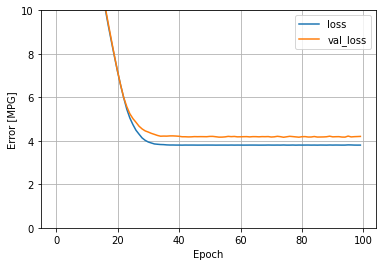

In [115]:
plot_loss(history)

What do we learn by looking at the history? 

In [116]:
test_results = {}

test_results['horsepower_model'] = horsepower_model.evaluate(
    test_features['Horsepower'],
    test_labels, verbose=0)

In [127]:
x = tf.linspace(0.0, 250, 251) # Generates evenly-spaced values in an interval along a given axis.
y = horsepower_model.predict(x) 

In [128]:
# using the same plotting library, compare predicted line to actual data
def plot_horsepower(x, y):
  plt.scatter(train_features['Horsepower'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()

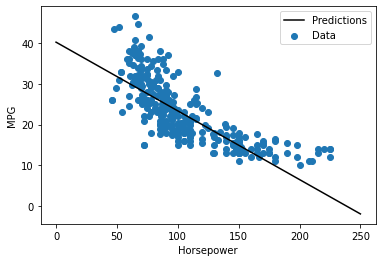

In [129]:
plot_horsepower(x,y)

Did this do well? How could it do better?